# Advanced Lane Lines Detection


# Test Camera Calibration


1) compute the camera calibration matrix and distortion coefficients given a set of chessboard images;


In [1]:
# import libs
%matplotlib inline
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import copy

# import functions from other files
from camera_calibration import calibrate_camera
from image_transformation import warp
from image_transformation import plotImageSet
from image_transformation import region_of_interest
from image_transformation import get_peak
from image_transformation import weighted_img

# Helper functions

In [2]:
# warp a lane shape from the perspective to the orthogonal view
# in fact we want to use it to do the inverse transformation
def warp_lane(img,direction=0):
    if len(img.shape)>2:
        height, width, channels = img.shape
    else:
        height, width = img.shape
        
    # compute the perspective transform M
    src_point_1 = (round(0.16*width),round(0.95*height))
    src_point_2 = (round(width*0.425),round(0.65*height))
    src_point_3 = (round(width*0.58),round(0.65*height))
    src_point_4 = (round(width*0.855), round(0.95*height))

    dst_point_1 = (round(0.2*width),height)
    dst_point_2 = (round(0.2*width),round(0.2*height))
    dst_point_3 = (round(0.85*width),round(0.2*height))
    dst_point_4 = (round(0.85*width),height)

    #four source and destination coordinates
    src = np.float32([src_point_1,src_point_2,src_point_3,src_point_4])
    dst = np.float32([dst_point_1,dst_point_2,dst_point_3,dst_point_4])

    warped_img = warp(img,src,dst,direction)
    return warped_img

In [3]:
# check and draw warping area of the image
def draw_wrap_area(img,color = (100,0,0)):
    height, width, channels = img.shape
    src_point_1 = (round(0.16*width),round(0.95*height))
    src_point_2 = (round(width*0.425),round(0.65*height))
    src_point_3 = (round(width*0.58),round(0.65*height))
    src_point_4 = (round(width*0.855), round(0.95*height))
    img_wrap_area = copy.copy(img)
    cv2.line(img_wrap_area, src_point_1, src_point_2, color, thickness=2)
    cv2.line(img_wrap_area, src_point_2, src_point_3, color, thickness=2)
    cv2.line(img_wrap_area, src_point_3, src_point_4, color, thickness=2)
    cv2.line(img_wrap_area, src_point_4, src_point_1, color, thickness=2)
    return img_wrap_area

# Camera Calibration

In [6]:
# 0. Calibrate the camera using the calibration images
nx = 9 # number of inside corners in x
ny = 6 # number of inside corners in y
mtx,dist = calibrate_camera('camera_cal/calibration*.jpg',nx, ny)

Calibrating camera... please be patient!
Camera calibrated using  17  out of  20  images!


<Figure size 432x288 with 0 Axes>

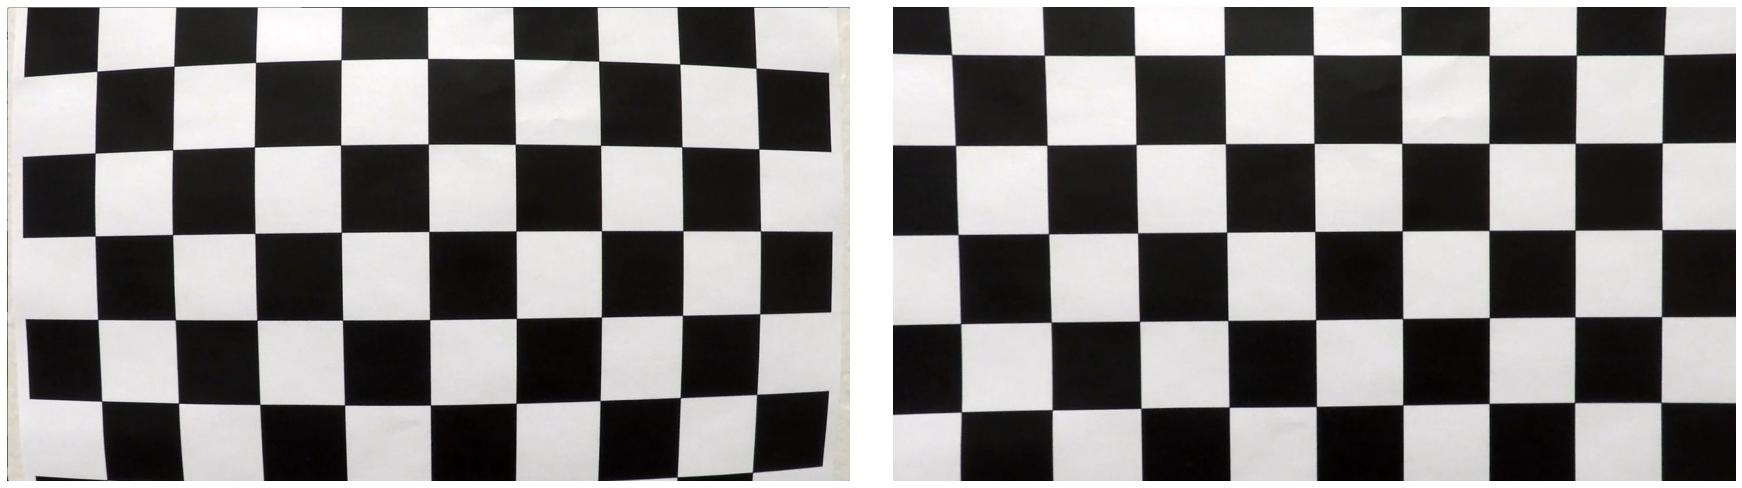

In [9]:
# 1 .Apply distortion correction to the raw image.

# test camera calibration
fname = 'camera_cal/calibration1.jpg'
img = mpimg.imread(fname)
undistorted_im = cv2.undistort(img, mtx, dist, None, mtx)
plotImageSet([img,undistorted_im]);
mpimg.imsave('report/distorted.png',img)
mpimg.imsave('report/undistorted.png',undistorted_im)

In [10]:
# get images list
images = os.listdir("test_images/")

FileNotFoundError: [Errno 2] No such file or directory: 'test_images/'

In [172]:
# initialise static variables
process_image.left_sp_avg = -10000
process_image.right_sp_avg = -10000
process_image.count = 0
identify_lines.prev_channel = []

# Note:  
The matplot.image library reads a png image using the imread command and gets the rgb channels converted to floats with a range from 0 to 1. If it is a jpg image then the values are from 0 to 255!  
img = mpimg.imread(filename)  

We could use instead the cv2 library, which reads files into a bgr format between 0 and 255 regardless if it is a png or a jpg file:  
img = cv2.imread(filename) # reads a file into bgr values 0-255  
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # convert to rgb  
plt.imshow(img)  

At the moment all the functions work with the second method so that we don't have to worry about using png of jpg files.

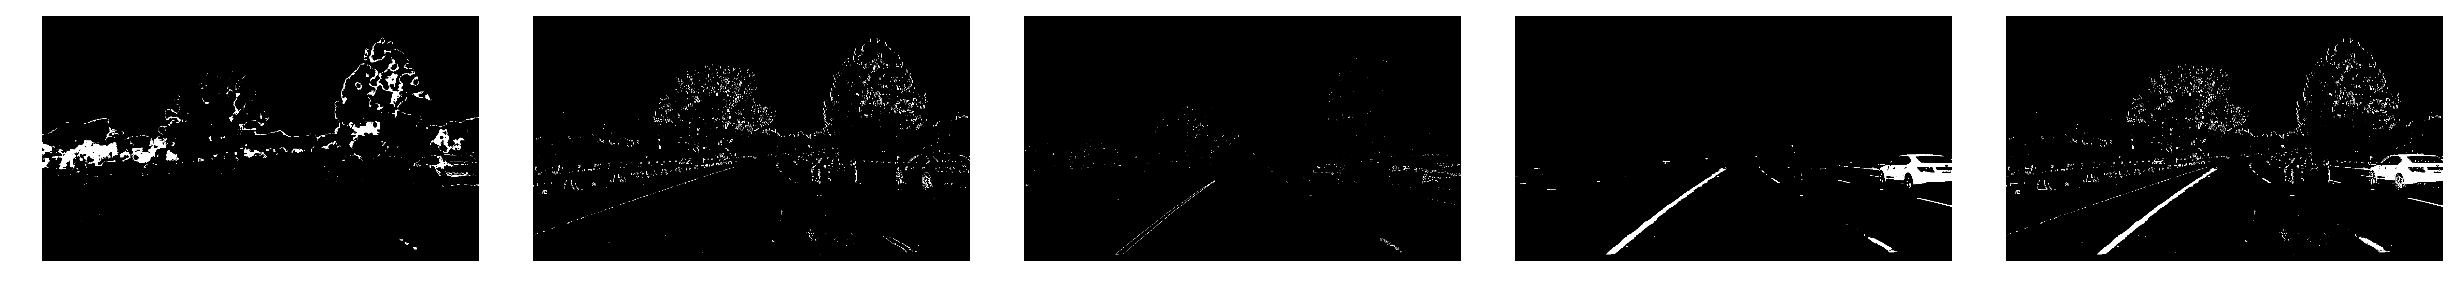

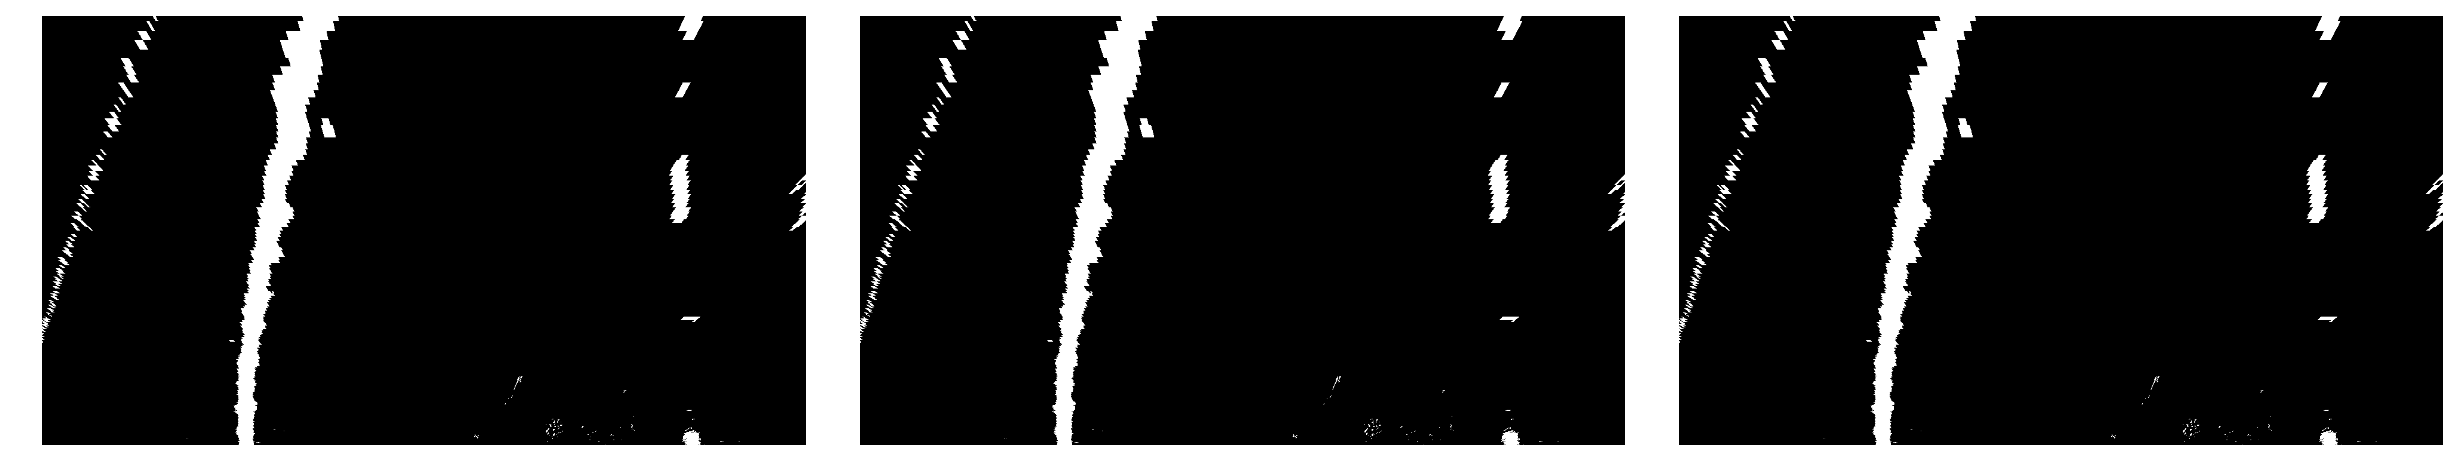

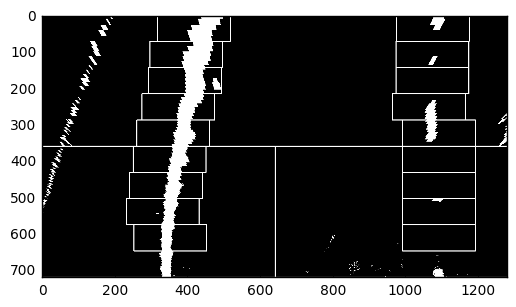

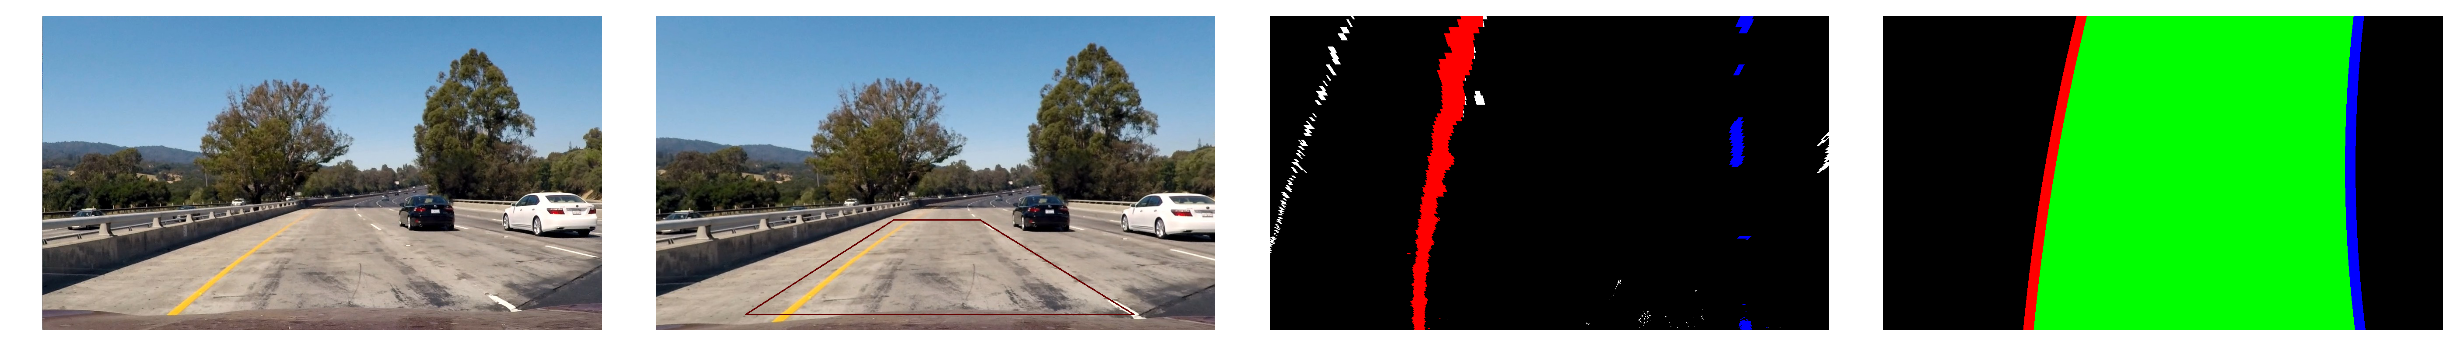

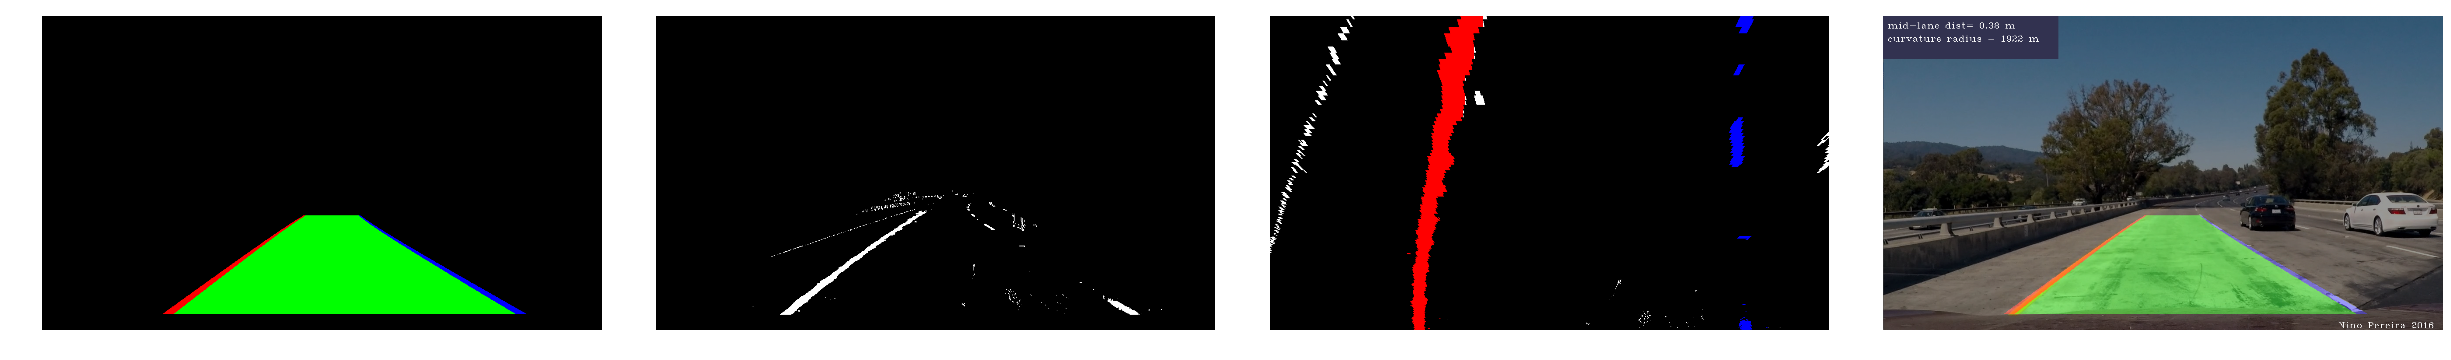

331 1090
-3801 -3346
count= 0


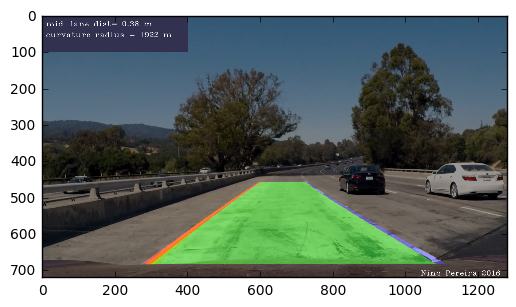

Finished processing image


In [174]:
#test filter_image
afile= "test1.jpg"
filename = 'test_images/'+afile 
img = cv2.imread(filename) # reads a file into bgr values 0-255  
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # inverts bgr to rgb

#img = mpimg.imread(filename) # reads to RGB format: (png -> float -> 0-1) and (jpg -> int -> 0-255)
    
filename = 'processed_images/'+afile
processed_img = process_image(img,debug=1)
mpimg.imsave(filename,processed_img)

plt.imshow(processed_img)
plt.show()
print('Finished processing image')

In [97]:
# process all images in the list
for afile in images:
    # get one image from the list
    print(afile)
    
    # remove the filters because this is not a continuous stream of images
    process_image.left_sp_avg = -10000
    process_image.right_sp_avg = -10000
    process_image.count = 0
    identify_lines.prev_channel==[] 
    
    filename = 'new_test_images/'+afile
    img = cv2.imread(filename) # reads a file into bgr values 0-255  
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # inverts bgr to rgb
    processed_img = process_image(img,debug=0)
    
    # save the processed image to the output folder
    filename = 'processed_images/'+afile
    mpimg.imsave(filename,processed_img)

print('Finished processing all images')

test20.png
test26.png
test05.png
test25.png
test18.png
test02.png
test10.png
test15.png
test11.png
test08.png
test07.png
test04.png
test22.png
test28.png
test23.png
test03.png
test19.png
test16.png
test12.png
test13.png
test21.png
test06.png
test27.png
test09.png
test14.png
test17.png
test01.png
Finished processing all images


In [98]:
video_output = 'project_video_output.mp4';
clip1 = VideoFileClip("project_video.mp4");
video_clip = clip1.fl_image(process_image); #NOTE: this function expects color images!!
%time video_clip.write_videofile(video_output, audio=False);
print('Finished processing video file')

[MoviePy] >>>> Building video project_video_output.mp4
[MoviePy] Writing video project_video_output.mp4


100%|█████████▉| 1260/1261 [3:18:09<00:09,  9.43s/it]


[MoviePy] Done.
[MoviePy] >>>> Video ready: project_video_output.mp4 

CPU times: user 3h 19min 43s, sys: 3.27 s, total: 3h 19min 47s
Wall time: 3h 18min 10s
Finished processing video file
